In [1]:
from train_RNA_ResNet import ResNet
from keras import callbacks as cb
from Calibration_Util import FileIO as io
import os
import numpy as np

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/ubuntu/anaconda3/envs/t

In [2]:
rnaNet = ResNet()

# GTEX as source and TCGA as target
source_file = 'unnorm-log-20PC-GTEX-breast-prostate-thyroid.csv'
target_file = 'unnorm-log-20PC-TCGA-breast-prostate-thyroid.csv'
source_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + source_file)
target_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + target_file)

# Make GTEX target and TCGA source
# target_file = 'unnorm-log-20PC-GTEX-breast-prostate-thyroid.csv'
# source_file = 'unnorm-log-20PC-TCGA-breast-prostate-thyroid.csv'
# source_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/' + source_file)
# target_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/' + target_file)


rnaNet.load_data(source_path=source_path,
                target_path=target_path)

In [3]:
print(rnaNet.source[0:4, 0:2])
print(rnaNet.target[0:4, 0:2])
print("\ngtex = source shape = " + str(rnaNet.source.shape))
print("tcga = target shape = " + str(rnaNet.target.shape))

[[-1047.59361381   -69.12575067]
 [ -999.46290114   -48.39665354]
 [-1044.10734269   -78.82105825]
 [-1060.32625385   -69.96689896]]
[[-1063.88655395   -92.71360174]
 [-1016.55539065   -76.95176009]
 [-1064.02777643   -84.89484393]
 [-1037.38639806   -88.54170399]]

gtex = source shape = (636, 20)
tcga = target shape = (211, 20)


In [4]:
# breast = re.compile(r'.*breast.*')
# prostate = re.compile(r'.*prostate.*')
# thyroid = re.compile(r'.*thyroid.*')

# ind = rnaNet.source_df.index

# def f(s):
#     if (re.search(breast, s)):
#         return 'breast'
#     elif (re.search(prostate, s)):
#         return 'prostate'
#     elif (re.search(thyroid, s)):
#         return 'thyroid'
    
#     return None

# [f(s) for s in ind]
# rnaNet.source_df.loc[:, "PC1":"PC20"].values


In [5]:
rnaNet.init_res_net()

setting scales using KNN
[24.906372145133943, 49.812744290267887, 99.625488580535773]
setting all scale weights to 1
(636, 20)


In [6]:
callbacks=[rnaNet.lrate, cb.EarlyStopping(monitor='val_loss', patience=100, mode='auto')]
rnaNet.train(epochs=100, callbacks=callbacks)

Train on 572 samples, validate on 64 samples
Epoch 1/100
572/572 [==============================] - 1s 1ms/step - loss: 1.2468 - val_loss: 1.8596
Epoch 2/100
572/572 [==============================] - 0s 480us/step - loss: 1.1542 - val_loss: 1.7591
Epoch 3/100
572/572 [==============================] - 0s 473us/step - loss: 1.0937 - val_loss: 1.6777
Epoch 4/100
572/572 [==============================] - 0s 476us/step - loss: 1.0802 - val_loss: 1.5935
Epoch 5/100
572/572 [==============================] - 0s 479us/step - loss: 1.0511 - val_loss: 1.5089
Epoch 6/100
572/572 [==============================] - 0s 473us/step - loss: 1.0570 - val_loss: 1.6117
Epoch 7/100
572/572 [==============================] - 0s 472us/step - loss: 1.0299 - val_loss: 1.6979
Epoch 8/100
572/572 [==============================] - 0s 472us/step - loss: 1.0254 - val_loss: 1.6698
Epoch 9/100
572/572 [==============================] - 0s 474us/step - loss: 1.0274 - val_loss: 1.5245
Epoch 10/100
572/572 [========

572/572 [==============================] - 0s 481us/step - loss: 0.9120 - val_loss: 1.7332
Epoch 80/100
572/572 [==============================] - 0s 474us/step - loss: 0.9257 - val_loss: 1.6091
Epoch 81/100
572/572 [==============================] - 0s 473us/step - loss: 0.9204 - val_loss: 1.6238
Epoch 82/100
572/572 [==============================] - 0s 479us/step - loss: 0.9286 - val_loss: 1.5793
Epoch 83/100
572/572 [==============================] - 0s 480us/step - loss: 0.9244 - val_loss: 1.6165
Epoch 84/100
572/572 [==============================] - 0s 480us/step - loss: 0.9287 - val_loss: 1.5605
Epoch 85/100
572/572 [==============================] - 0s 488us/step - loss: 0.9194 - val_loss: 1.6777
Epoch 86/100
572/572 [==============================] - 0s 480us/step - loss: 0.9326 - val_loss: 1.4740
Epoch 87/100
572/572 [==============================] - 0s 479us/step - loss: 0.9224 - val_loss: 1.6567
Epoch 88/100
572/572 [==============================] - 0s 470us/step - loss:

In [7]:
rnaNet.pca()

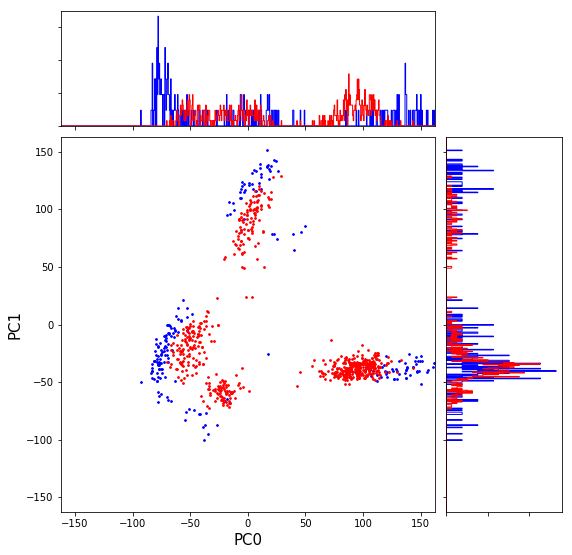

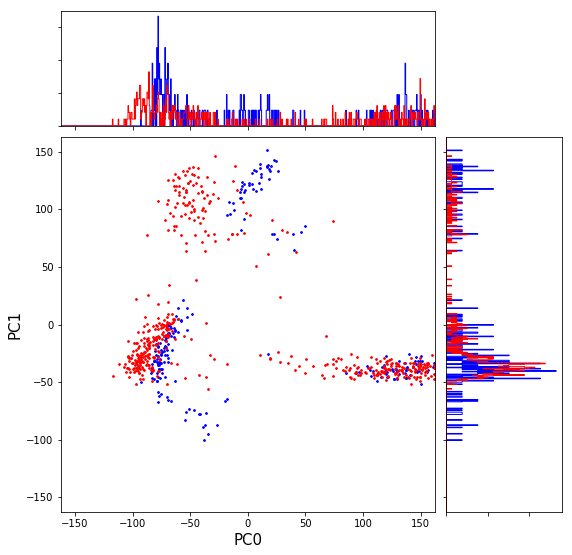

In [8]:
%matplotlib inline

rnaNet.scatter_hist()

(211, 20)
(636, 20)
(636, 20)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

def multiScatterHist(x1, x2, y1, y2, colors1, colors2, axis1='', axis2=''):
    nullfmt = NullFormatter()         # no labels
    
    # sanity check
    print("colors1 shape = " + str(colors1.shape) + " colors2 shape = " + str(colors2.shape))
    print("x1 shape = " + str(x1.shape) + " x2 shape = " + str(x2.shape))
    print("y1 shape = " + str(y1.shape) + " y2 shape = " + str(y2.shape))
    
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02
    
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]
    
    # start with a rectangular Figure
    plt.figure(figsize=(12, 12))
       
    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)
    
    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)
    
    # the scatter plot:
    axScatter.scatter(x1, x2, color=colors1, marker='o', s=20)
    axScatter.scatter(y1, y2, color=colors2, marker='s', facecolors='none', s=20) 


    # now determine nice limits by hand:
    binwidth = 0.5
    xymax = np.max([np.max(np.fabs(x1)), np.max(np.fabs(x2))]) + 10
    lim = (int(xymax/binwidth) + 1) * binwidth
    
    axScatter.set_xlim((-lim, lim))
    axScatter.set_ylim((-lim, lim))
    
    bins = np.arange(-lim, lim + binwidth, binwidth)
    axHistx.hist(x1, bins=bins, color = 'blue', normed=True, stacked = True, histtype='step' )
    axHisty.hist(x2, bins=bins, orientation='horizontal', color = 'blue', normed=True, 
                 stacked = True, histtype='step')
    axHistx.hist(y1, bins=bins, color = 'red', normed=True, stacked = True, histtype='step')
    axHisty.hist(y2, bins=bins, orientation='horizontal', color = 'red', normed=True, 
                 stacked = True, histtype='step')
    
    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    
    axHistx.set_xticklabels([])
    axHistx.set_yticklabels([])
    axHisty.set_xticklabels([])
    axHisty.set_yticklabels([])
    axScatter.set_xlabel(axis1, fontsize=15)
    axScatter.set_ylabel(axis2, fontsize=15)

    plt.show()